In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yeyo as yy

In [7]:
df_portugal = yy.cargar_dataset('Portugal.csv')
df_mexico = yy.cargar_dataset('Mexico.csv')

In [9]:
#Eliminar columnas inncesarias
df_portugal = df_portugal.drop(['Unnamed: 0'],axis=1)
df_portugal

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,46609,Byron Beach Cabin,208641,Glen,2010-08-21,within an hour,100%,83%,f,1,...,4.92,4.96,5.00,5.00,4.92,4.77,f,1,1,0
1,59459,Tea on the Terrace,285576,Liz,2010-11-12,within an hour,100%,93%,t,1,...,4.93,4.94,4.94,4.94,4.80,4.92,f,1,0,1
2,111036,5 Star Luxury @ Tweed Coast - Salt Village,569563,Tricia,2011-05-09,within an hour,100%,96%,t,1,...,4.97,4.94,4.84,4.92,4.97,4.88,t,1,1,0
3,113407,Byron Bay Hinterland House & Pool POCKET PINES,576938,Jo,2011-05-10,within an hour,100%,95%,t,1,...,4.88,4.75,4.96,4.98,4.88,4.71,f,1,1,0
4,259951,Rosebank Farmhouse,1340489,Ann-Marie,2011-10-27,within an hour,100%,100%,f,1,...,4.88,4.76,5.00,5.00,4.94,4.71,f,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6241,1309169243696998503,Tweed Coastal Retreat,8586213,Matthew,2013-09-02,NaN,NaN,NaN,f,1,...,NaN,NaN,NaN,NaN,NaN,NaN,t,1,1,0
6242,1309580556361446644,13 William - Oceanstays - Pet Friendly,498657660,Oceanstays,2023-01-30,within an hour,100%,99%,t,39,...,NaN,NaN,NaN,NaN,NaN,NaN,t,39,39,0
6243,1310599322159916197,La Casita Studio,472492532,Camila,2022-07-31,NaN,NaN,NaN,f,2,...,NaN,NaN,NaN,NaN,NaN,NaN,t,1,1,0
6244,1310616537700203937,Rachana.,152421180,Your Luxury Escape,2017-09-28,within a few hours,84%,99%,t,66,...,NaN,NaN,NaN,NaN,NaN,NaN,t,66,61,5


In [11]:
yy.cuenta_valores_nulos(df_portugal)

('Valores nulos por columna',
 id                                                 0
 name                                               0
 host_id                                            0
 host_name                                          0
 host_since                                         0
 host_response_time                               723
 host_response_rate                               723
 host_acceptance_rate                             518
 host_is_superhost                                104
 host_listings_count                                0
 host_identity_verified                             0
 neighbourhood_cleansed                             0
 neighbourhood_group_cleansed                    6246
 latitude                                           0
 longitude                                          0
 property_type                                      0
 room_type                                          0
 accommodates                                       

In [12]:
yy.cuenta_valores_nulos(df_mexico)

('Valores nulos por columna',
 id                                                 0
 listing_url                                        0
 scrape_id                                          0
 last_scraped                                       0
 source                                             0
                                                 ... 
 calculated_host_listings_count                     0
 calculated_host_listings_count_entire_homes        0
 calculated_host_listings_count_private_rooms       0
 calculated_host_listings_count_shared_rooms        0
 reviews_per_month                               3296
 Length: 75, dtype: int64,
 'Valores nulos por dataframe',
 187332)

In [13]:
#Separamos las columnas con valores cuantitativos
cuant_portugal = df_portugal.select_dtypes(include=['number'])
cual_portugal = df_portugal.select_dtypes(include=['object', 'category'])
cuant_mex = df_mexico.select_dtypes(include=['number'])
cual_mex = df_mexico.select_dtypes(include=['object', 'category'])

<Figure size 1500x800 with 0 Axes>

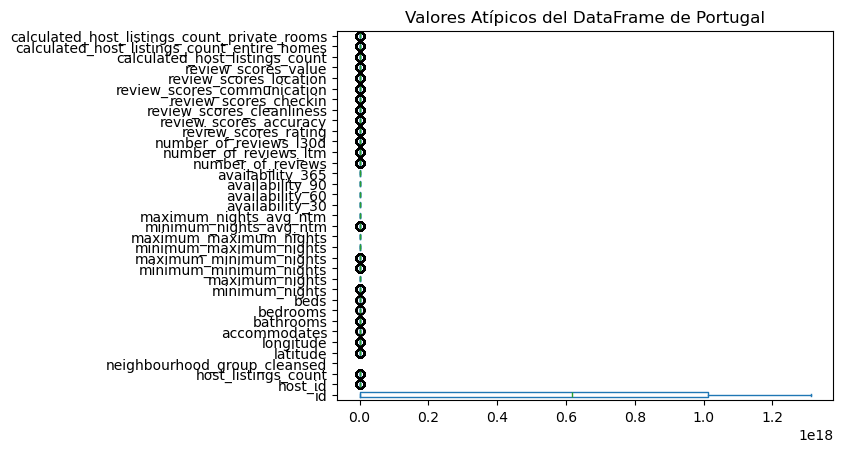

In [14]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize=(15,8))
cuant_portugal.plot(kind='box', vert=False)
plt.title('Valores Atípicos del DataFrame de Portugal')
plt.show() #dibujamos el diagrama

<Figure size 1500x800 with 0 Axes>

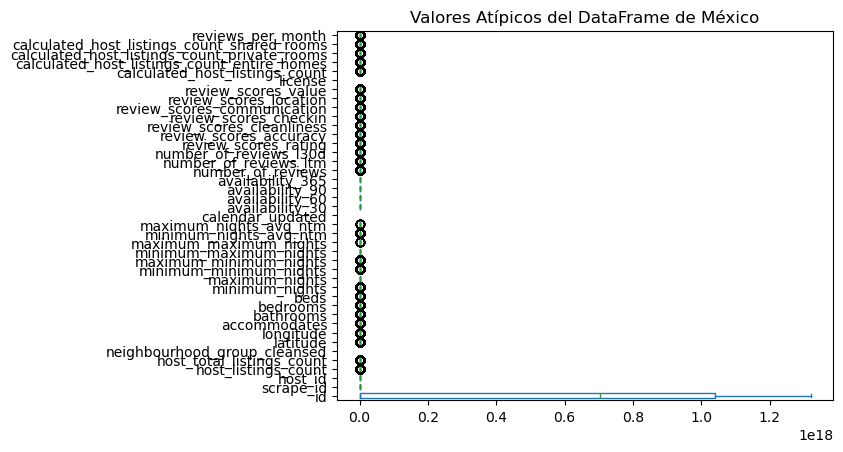

In [15]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize=(15,8))
cuant_mex.plot(kind='box', vert=False)
plt.title('Valores Atípicos del DataFrame de México')
plt.show() #dibujamos el diagrama

In [19]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y = cuant_portugal

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75-percentile25 

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Límite superior permitido',Limite_Superior_iqr)
print('Límite inferior permitido',Limite_Inferior_iqr)

Límite superior permitido id                                              2.532774e+18
host_id                                         5.333634e+08
host_listings_count                             9.350000e+01
neighbourhood_group_cleansed                             NaN
latitude                                       -2.801510e+01
longitude                                       1.538309e+02
accommodates                                    1.450000e+01
bathrooms                                       3.500000e+00
bedrooms                                        6.000000e+00
beds                                            8.500000e+00
minimum_nights                                  6.000000e+00
maximum_nights                                  2.745000e+03
minimum_minimum_nights                          6.000000e+00
maximum_minimum_nights                          1.450000e+01
minimum_maximum_nights                          2.770500e+03
maximum_maximum_nights                          2.677500e+0

In [21]:
por_limpio = cuant_portugal[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
por_limpio

,id,host_id,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,46609,208641.0,1.0,NaN,-28.689501,153.611160,2.0,1.0,1.0,1.0,...,4.98,4.92,4.96,5.00,5.00,4.92,4.77,1.0,1.0,0.0
1,59459,285576.0,1.0,NaN,NaN,153.202480,2.0,1.0,1.0,1.0,...,4.92,4.93,4.94,4.94,4.94,4.80,4.92,1.0,0.0,NaN
2,111036,569563.0,1.0,NaN,-28.275930,153.576320,2.0,1.0,1.0,1.0,...,4.89,4.97,4.94,4.84,4.92,4.97,4.88,1.0,1.0,0.0
3,113407,576938.0,1.0,NaN,-28.514350,153.492700,4.0,1.0,2.0,2.0,...,4.92,4.88,4.75,4.96,4.98,4.88,4.71,1.0,1.0,0.0
4,259951,1340489.0,1.0,NaN,-28.687510,153.389650,8.0,2.0,4.0,7.0,...,5.00,4.88,4.76,5.00,5.00,4.94,4.71,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6241,1309169243696998503,8586213.0,1.0,NaN,-28.222863,153.550894,6.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0
6242,1309580556361446644,498657660.0,39.0,NaN,NaN,153.346484,10.0,2.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,39.0,0.0
6243,1310599322159916197,472492532.0,2.0,NaN,-28.848475,153.448546,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0
6244,1310616537700203937,152421180.0,66.0,NaN,-28.650260,153.616987,10.0,3.5,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,61.0,NaN


In [23]:
portugal_iqr = por_limpio.copy()
portugal_iqr = portugal_iqr.fillna(round(por_limpio.mean(),1))
portugal_iqr

,id,host_id,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,46609,208641.0,1.0,NaN,-28.689501,153.611160,2.0,1.0,1.0,1.0,...,4.98,4.92,4.96,5.00,5.00,4.92,4.77,1.0,1.0,0.0
1,59459,285576.0,1.0,NaN,-28.600000,153.202480,2.0,1.0,1.0,1.0,...,4.92,4.93,4.94,4.94,4.94,4.80,4.92,1.0,0.0,0.0
2,111036,569563.0,1.0,NaN,-28.275930,153.576320,2.0,1.0,1.0,1.0,...,4.89,4.97,4.94,4.84,4.92,4.97,4.88,1.0,1.0,0.0
3,113407,576938.0,1.0,NaN,-28.514350,153.492700,4.0,1.0,2.0,2.0,...,4.92,4.88,4.75,4.96,4.98,4.88,4.71,1.0,1.0,0.0
4,259951,1340489.0,1.0,NaN,-28.687510,153.389650,8.0,2.0,4.0,7.0,...,5.00,4.88,4.76,5.00,5.00,4.94,4.71,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6241,1309169243696998503,8586213.0,1.0,NaN,-28.222863,153.550894,6.0,1.0,2.0,2.0,...,4.90,4.90,4.80,4.90,4.90,4.90,4.80,1.0,1.0,0.0
6242,1309580556361446644,498657660.0,39.0,NaN,-28.600000,153.346484,10.0,2.0,4.0,5.0,...,4.90,4.90,4.80,4.90,4.90,4.90,4.80,39.0,39.0,0.0
6243,1310599322159916197,472492532.0,2.0,NaN,-28.848475,153.448546,2.0,1.0,1.0,1.0,...,4.90,4.90,4.80,4.90,4.90,4.90,4.80,1.0,1.0,0.0
6244,1310616537700203937,152421180.0,66.0,NaN,-28.650260,153.616987,10.0,3.5,5.0,5.0,...,4.90,4.90,4.80,4.90,4.90,4.90,4.80,66.0,61.0,0.0


In [26]:
por_limpio = pd.concat([cual_portugal, portugal_iqr], axis=1)
por_limpio

,name,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,Byron Beach Cabin,Glen,2010-08-21,within an hour,100%,83%,f,t,BYRON SHIRE COUNCIL,Entire cabin,...,4.98,4.92,4.96,5.00,5.00,4.92,4.77,1.0,1.0,0.0
1,Tea on the Terrace,Liz,2010-11-12,within an hour,100%,93%,t,t,CLARENCE VALLEY COUNCIL,Private room in townhouse,...,4.92,4.93,4.94,4.94,4.94,4.80,4.92,1.0,0.0,0.0
2,5 Star Luxury @ Tweed Coast - Salt Village,Tricia,2011-05-09,within an hour,100%,96%,t,t,TWEED SHIRE COUNCIL,Entire rental unit,...,4.89,4.97,4.94,4.84,4.92,4.97,4.88,1.0,1.0,0.0
3,Byron Bay Hinterland House & Pool POCKET PINES,Jo,2011-05-10,within an hour,100%,95%,t,t,BYRON SHIRE COUNCIL,Entire home,...,4.92,4.88,4.75,4.96,4.98,4.88,4.71,1.0,1.0,0.0
4,Rosebank Farmhouse,Ann-Marie,2011-10-27,within an hour,100%,100%,f,t,LISMORE CITY COUNCIL,Farm stay,...,5.00,4.88,4.76,5.00,5.00,4.94,4.71,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6241,Tweed Coastal Retreat,Matthew,2013-09-02,NaN,NaN,NaN,f,t,TWEED SHIRE COUNCIL,Entire rental unit,...,4.90,4.90,4.80,4.90,4.90,4.90,4.80,1.0,1.0,0.0
6242,13 William - Oceanstays - Pet Friendly,Oceanstays,2023-01-30,within an hour,100%,99%,t,t,CLARENCE VALLEY COUNCIL,Entire home,...,4.90,4.90,4.80,4.90,4.90,4.90,4.80,39.0,39.0,0.0
6243,La Casita Studio,Camila,2022-07-31,NaN,NaN,NaN,f,t,BALLINA SHIRE COUNCIL,Entire home,...,4.90,4.90,4.80,4.90,4.90,4.90,4.80,1.0,1.0,0.0
6244,Rachana.,Your Luxury Escape,2017-09-28,within a few hours,84%,99%,t,t,BYRON SHIRE COUNCIL,Entire home,...,4.90,4.90,4.80,4.90,4.90,4.90,4.80,66.0,61.0,0.0


In [27]:
yy.cuenta_valores_nulos(por_limpio)

('Valores nulos por columna',
 name                                               0
 host_name                                          0
 host_since                                         0
 host_response_time                               723
 host_response_rate                               723
 host_acceptance_rate                             518
 host_is_superhost                                104
 host_identity_verified                             0
 neighbourhood_cleansed                             0
 property_type                                      0
 room_type                                          0
 bathrooms_text                                     0
 price                                            378
 has_availability                                  35
 instant_bookable                                   0
 id                                                 0
 host_id                                            0
 host_listings_count                                

In [28]:
por_limpio.to_csv('Portugal_Limpio.csv')